# PPSDA Final project              
# Date: 19/12/2022
Name: UMUHOZA Alice

AndrewId: ualice

# Activity: Building Machine Learning (ML) for Detecting Cyber-attacks and Problems in Industrial Control Systems
Activity (Task) objectives

1) Performing data preparatrion, exploratory data analysis and preprocess the data to be used for Activity completion
2) Perform feature engineering and selection
3) Building and evaluating the ML models which is the main goal of this project (3 learners will be tested)
4) Select benchmark model and perform hyperparamter tuning
5) Building and evaluating tuned model through hyperparameter tuning
6) Compare the models perfromance using visualization metric to highlight the comparison
6) compare the tuned model and benchmark model using visualization measure to draw the conclusion of the best model to be used in detecting and classifying power system disturbance in ICS

To fulfill task requirements various libraries were used such as pandas, numpy, matplotlib and sklearn for model selection, creation, data preprocessing as well as for features selection.

# Importing required Libraries to complete the task requirements

In [42]:
# importing packages
import pandas as pd
import glob
# from dataprep.eda import plot, plot_correlation, plot_missing
import numpy as np
from numpy import absolute 
from scipy.stats import chi2  # importing scipy
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Machine learning models used from sckit learn library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier #ensemble model
#for preprocessing e.g. data transformation
from sklearn.preprocessing import LabelEncoder, StandardScaler #preprocessing and scaling
# Feature selection 
from sklearn.linear_model import Lasso, LassoCV
#for model selection and evaluation
from sklearn.model_selection import KFold, cross_validate, cross_val_score, GridSearchCV # for data splitting, evaluating the model performance

# A. PART 1: JUPYTER NOTEBOOK

# 1) Data preparation
Data preparation enables us to correct the data for analysis. It involves downloading the datasets, load the datasdets downloaded into pandas dataframes using pandas library. In this step, as mentioned in the cited paper The datasets were randomly sampled at 1% to reduce the size and evaluate the effectiveness of small sample sizes as well as to minimize running time, therefore in this step 1 % data sample is considered from each dataset to further our analyis; the final data set were created by concatenating each 1 % data from each dataset.

# Load the data using pandas
To load the data for loop were considered as we have to load all fifteen dataset into pandas dataframes
As stated above the data sets were randomly sampled at one percent and grouped into binary, three class and Multiclass datasets. in our experiments we are working with three class dataset which consists of 129 columns (128 features, 1 dependent variable) with 29 measurements from each phsor measurement units (PMU) which measure electrical waves on electricity grid. we have 4 PMUs which measure 29 features for 116 PMU measurement columns in total. the indices of those columns start by R which are  R1 through R4 (Intelligent Electronic Devices (IEDs) that can
switch the breakers on or off) and we have 12 columns for control panel logs, Snort alerts and relay logs of the 4 PMU/relay (where relay and PMU are integrated together).
Reference: https://sites.google.com/a/uah.edu/tommy-morris-uah/ics-data-sets?pli=1


In [43]:
# Loading the data 
file_list=['data1.csv','data2.csv','data3.csv','data4.csv','data5.csv','data6.csv','data7.csv','data8.csv','data9.csv','data10.csv','data11.csv','data12.csv','data13.csv','data14.csv','data15.csv']
main_dataframe = pd.DataFrame(pd.read_csv(file_list[0]))
Full_dataset_for_analysis=main_dataframe.sample(int(len(main_dataframe)*0.01), ignore_index=True, random_state=0)
# print(Full_dataset_for_analysis.shape)
for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i])   
    # print(data.shape)              
    df = data.sample(int(len(data)*0.01), ignore_index=True, random_state=0)
    # print(df.shape)
    Full_dataset_for_analysis=pd.concat([Full_dataset_for_analysis,df],axis=0)
    

# View the data

In [44]:
# view the data from all over fifteen dataset 
Full_dataset_for_analysis

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-125.059498,131985.6933,114.963982,131935.5467,-5.036299,132060.9131,-124.721453,326.48513,113.680556,330.33044,...,0,0,0,0,0,0,0,0,0,Attack
1,27.656673,131283.6417,-92.326419,131233.4952,147.674142,131333.7883,25.576836,435.98491,-95.999079,440.37955,...,0,0,0,0,0,0,0,0,0,Natural
2,-73.688102,131785.1071,166.346837,131760.0339,46.340826,131835.2537,-75.710643,365.30445,164.318566,366.76933,...,0,0,0,0,0,0,0,0,0,Attack
3,64.887470,131609.5942,-55.089892,131584.5210,-175.090173,131684.8140,62.395104,388.55942,-56.711363,386.91143,...,0,0,0,0,0,0,0,0,0,Attack
4,126.577836,131258.5685,6.583285,130631.7367,-113.394077,131308.7150,122.486917,455.21146,2.584040,455.76079,...,0,0,0,0,0,0,0,0,0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,-173.371299,133991.5549,66.657910,133966.4816,-53.348100,134066.7747,0.000000,0.00000,0.000000,0.00000,...,0,1,1,0,0,0,0,0,0,Attack
48,133.103825,131810.1804,13.132193,131760.0339,-106.879547,131860.3269,131.619865,348.82455,11.688339,347.54278,...,0,0,0,0,0,0,0,0,0,NoEvents
49,11.568018,131409.0081,-108.397885,131383.9348,131.596946,131484.2279,8.170378,421.88544,-111.841362,423.89965,...,0,0,0,0,0,0,0,0,0,Attack
50,-61.358050,131057.9823,178.659700,130406.0773,58.670878,131133.2021,-65.930253,480.29753,174.081767,480.48064,...,0,0,0,0,0,0,0,0,0,Attack


In [45]:
Full_dataset_for_analysis.head(20)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-125.059498,131985.6933,114.963982,131935.5467,-5.036299,132060.9131,-124.721453,326.48513,113.680556,330.33044,...,0,0,0,0,0,0,0,0,0,Attack
1,27.656673,131283.6417,-92.326419,131233.4952,147.674142,131333.7883,25.576836,435.98491,-95.999079,440.37955,...,0,0,0,0,0,0,0,0,0,Natural
2,-73.688102,131785.1071,166.346837,131760.0339,46.340826,131835.2537,-75.710643,365.30445,164.318566,366.76933,...,0,0,0,0,0,0,0,0,0,Attack
3,64.887470,131609.5942,-55.089892,131584.5210,-175.090173,131684.8140,62.395104,388.55942,-56.711363,386.91143,...,0,0,0,0,0,0,0,0,0,Attack
4,126.577836,131258.5685,6.583285,130631.7367,-113.394077,131308.7150,122.486917,455.21146,2.584040,455.76079,...,0,0,0,0,0,0,0,0,0,Natural
5,-171.108116,131785.1071,68.892445,131133.2021,-51.102106,131835.2537,-170.042414,357.43072,67.230868,368.41732,...,0,0,0,0,0,0,0,0,0,Natural
6,-14.295297,130556.5169,-134.272659,130531.4436,105.722172,130631.7367,-14.839607,406.32109,-132.966316,397.71492,...,0,0,0,0,0,0,0,0,0,Natural
7,159.482802,132336.7191,39.499710,132286.5725,-80.506300,132411.9389,161.018329,257.81888,42.043643,254.15668,...,0,0,0,0,0,0,0,0,0,Attack
8,161.201676,133439.9429,41.218584,133389.7964,-78.781697,133515.1628,165.023304,381.60124,38.456927,415.29348,...,0,0,0,0,0,0,0,0,0,Attack
9,140.701246,132361.7923,20.706695,131709.8873,-99.287856,132411.9389,142.500333,267.70682,21.491647,270.81969,...,0,0,0,0,0,0,0,0,0,Attack


In [46]:
Full_dataset_for_analysis.tail(20)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
32,105.871141,136824.8344,-14.094762,136824.8344,-134.077854,136925.1275,112.362753,332.16154,-15.521427,368.78354,...,0,0,0,0,0,0,0,0,0,Attack
33,28.498921,130355.9307,-91.478442,130305.7842,148.533579,130431.1505,26.648267,481.76241,-96.090752,494.21389,...,0,0,0,0,0,0,0,0,0,Natural
34,-30.939721,132010.7666,-150.934272,132010.7666,89.089208,132085.9864,-33.867535,408.33530,-154.068351,410.34951,...,0,0,0,0,0,0,0,0,0,NoEvents
35,-15.177652,134994.4857,-135.172203,134969.4124,104.828358,135094.7788,-12.158164,414.19482,-138.650057,447.88706,...,0,0,0,0,0,0,0,0,0,Natural
36,-154.990813,131559.4477,85.021207,130932.6159,-34.961885,131634.6675,-157.689444,407.41975,82.454356,407.23664,...,0,0,0,0,0,0,0,0,0,Natural
37,-40.571141,131985.6933,-160.559963,131960.6200,79.463517,132085.9864,-32.807563,280.89074,-161.132921,312.93499,...,0,0,0,0,0,0,0,0,0,Attack
38,-135.292524,131534.3744,104.725226,131484.2279,-15.269325,131584.5210,-138.002614,406.68731,101.625524,407.05353,...,0,0,0,0,0,0,0,0,0,Attack
39,38.032938,132111.0596,-81.950153,131459.1546,158.056137,132161.2062,37.156313,320.07628,-82.540300,320.07628,...,0,0,0,0,0,0,0,0,0,Natural
40,-32.710161,131108.1288,-152.687523,131083.0556,87.313038,131183.3486,-36.720865,461.43720,-156.245591,459.05677,...,0,0,0,0,0,0,0,0,0,Attack
41,-32.332008,130180.4178,-152.297911,130180.4178,87.696920,130255.6377,-34.623840,451.18304,-152.733359,442.02754,...,0,0,0,0,0,0,0,0,0,Attack


# 2) Exploratory Data Analysis (EDA)
1) EDA enables us to understand the data we are working with and communicate the valuable insight obtained. It involves detecting duplicate, missing values and outliers, etc. it also enables us to identify dataset shape, dataset columns, datatypes, uniqueness of observations in columns, etc.
2) Understanding variables - univariate, bi-variate, multi-variate analysis

univariate analysis: by using histograms and box plots

bi-variate analysis: by using the likes of scatter plots (graphical), correlation matrices (numerical), heatmaps (graphical), pairplots(graphical).
And finally, communicate the insights obtained.

# Checking dataset variables name, length, size, shape and data types

In [47]:
print(Full_dataset_for_analysis.columns)

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       ...
       'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log',
       'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4',
       'marker'],
      dtype='object', length=129)


In [48]:
# checking for dataset attributes length
len(Full_dataset_for_analysis.columns)

129

In [49]:
# checking datasize
Full_dataset_for_analysis.size

100233

In [50]:
# checking for dataset shape
Full_dataset_for_analysis.shape

(777, 129)

In [51]:
# Basic information about the dataset
Full_dataset_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 51
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 789.1+ KB


# Review the data by considering small sample

In [52]:
# review the data by taking a sample of the data to easy get a feel for the data quickly
Full_dataset_for_analysis.sample(50)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
17,48.770168,130932.6159,-71.201465,130907.5427,168.804826,130982.7625,43.940133,489.08681,-75.481460,488.35437,...,0,0,0,0,0,0,0,0,0,Attack
23,-135.991533,131960.6200,104.026217,131383.9348,-15.956875,132035.8398,-136.352496,338.20417,102.639659,341.86637,...,0,0,0,0,0,0,0,0,0,Attack
20,-117.135492,130832.3229,122.876529,130205.4911,2.881978,130907.5427,-122.229086,507.58092,118.229841,506.48226,...,0,0,0,0,0,0,0,0,0,Attack
0,-62.979521,130706.9565,177.055418,130656.8100,57.043678,130757.1031,-68.279380,517.83508,171.675344,516.37020,...,0,0,0,0,0,0,0,0,0,NoEvents
23,-103.825682,131760.0339,136.186338,131709.8873,16.186058,131835.2537,-105.785198,368.78354,133.854400,370.24842,...,0,0,0,0,0,0,0,0,0,Attack
15,-172.758234,129252.7069,67.288163,129227.6336,-52.723576,129327.9267,-175.084443,485.42461,62.939414,498.05920,...,0,0,0,0,0,0,0,0,0,Attack
35,-15.177652,134994.4857,-135.172203,134969.4124,104.828358,135094.7788,-12.158164,414.19482,-138.650057,447.88706,...,0,0,0,0,0,0,0,0,0,Natural
50,-162.336132,132462.0854,77.687347,132411.9389,-42.318663,132537.3052,-160.886549,255.43845,78.735860,255.07223,...,0,0,0,0,0,0,0,0,0,NoEvents
37,-8.462587,130029.9782,-128.439949,129403.1465,111.560612,130105.1980,-10.548153,493.66456,-133.258524,509.59513,...,0,0,0,0,0,0,0,0,0,Attack
20,-12.582153,131183.3486,-132.559516,131183.3486,107.441046,131258.5685,-16.667342,452.09859,-136.598868,453.92969,...,0,0,0,0,0,0,0,0,0,Attack


# Summary statistics

In [53]:
# Descriptive Statistics to understand the data characteristics and to get a quick summary of it using describe function
Full_dataset_for_analysis.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,...,777.0,777.0,777.000000,777.000000,777.000000,777.000000,777.0,777.0,777.0,777.0
mean,-16.750727,130892.311551,-3.679480,131126.457814,14.687784,131489.649132,-14.604134,400.102420,-3.247248,392.829630,...,0.0,0.0,0.030888,0.024453,0.030888,0.036036,0.0,0.0,0.0,0.0
std,97.701979,6734.717151,114.023991,3234.383548,96.890204,3280.095640,96.573181,195.515048,111.855475,157.853805,...,0.0,0.0,0.173126,0.154550,0.173126,0.186500,0.0,0.0,0.0,0.0
min,-179.754049,59649.309330,-179.880100,107037.789600,-179.754049,107138.082700,-179.966044,0.000000,-179.696753,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,-97.425743,131032.909000,-116.247407,130706.956500,-58.544828,131083.055600,-94.744301,305.793700,-114.259243,312.934990,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,-29.364087,131709.887300,-1.713144,131383.934800,23.365219,131760.033900,-22.385461,378.122150,0.000000,385.080330,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,58.865684,132211.352700,103.006352,131860.326900,92.905106,132261.499300,57.622365,462.169640,102.536527,465.282510,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,179.994691,144171.302500,179.839993,143469.250900,179.920207,144246.522300,179.880100,1688.091090,178.894612,1226.653890,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


# Checking duplicate in the dataset

In [54]:
#Find the duplicates using duplicate.sum() function to the sum of duplicate value present if any in the data
Full_dataset_for_analysis.duplicated().sum()

0

# Identifying Uniqueness in the marker column which serves as dependent variable

In [55]:
# visualize the unique values present in the data
# find the number of unique values in the marker column using unique() function
Full_dataset_for_analysis['marker'].unique()

array(['Attack', 'Natural', 'NoEvents'], dtype=object)

# Identify & Visualize the contribution of each class from three class present in the marker column

In [56]:
# Identify and visualize the unique values present in the data in the marker column
# identifying unique values available in marker column
count=Full_dataset_for_analysis['marker'].value_counts()
count

marker
Attack      556
Natural     167
NoEvents     54
Name: count, dtype: int64

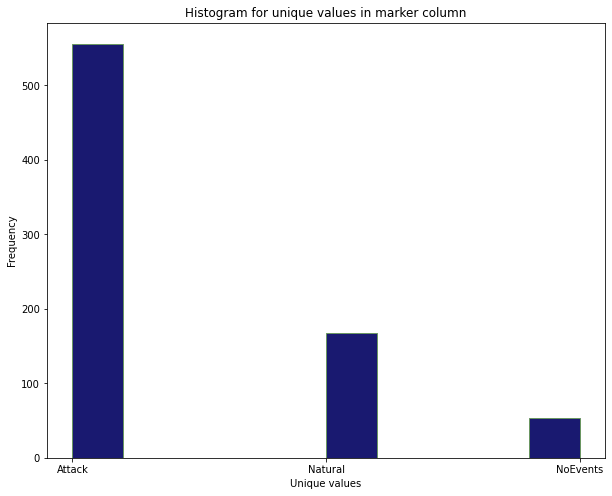

In [57]:
#Plot the unique values by calling histogram function
Indices=np.arange(len(Full_dataset_for_analysis['marker'].unique()))
plt.figure(figsize=(10,8))
plt.hist(Full_dataset_for_analysis['marker'], edgecolor="#6A9662",color="midnightblue")
plt.title('Histogram for unique values in marker column')
plt.xticks(Indices,Full_dataset_for_analysis['marker'].unique())
plt.xlabel("Unique values",loc='center')
plt.ylabel('Frequency')
plt.show()

# Checking null values in the dataset

In [58]:
# checking for null values that are in whole dataframe
Check_null=Full_dataset_for_analysis.isnull().sum().sum()
Check_null

0

In [59]:
# # Gives a bar chart of the missing values
# msno.bar(Full_dataset_for_analysis)

In [60]:
# Descriptive Statistics to understand the data characteristics and to get a quick summary of it using describe function
Full_dataset_for_analysis.sample(50).describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.0,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.0,50.0
mean,2.539234,129672.934867,-23.622362,130668.845148,21.675108,130993.794722,2.120631,403.091030,-14.490217,385.739526,...,0.0,0.0,0.020000,0.020000,0.020000,0.020000,0.0,0.0,0.0,0.0
std,90.937224,10923.693871,112.745954,4689.505202,104.572138,4659.717746,92.664807,236.987651,112.251588,148.286271,...,0.0,0.0,0.141421,0.141421,0.141421,0.141421,0.0,0.0,0.0,0.0
min,-177.846100,60802.679750,-179.020663,107037.789600,-173.004606,107138.082700,-179.083688,0.000000,-171.864420,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,-60.739256,131139.470425,-119.212464,130895.006025,-70.014010,131195.885250,-63.427860,314.170982,-121.073144,323.692702,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,-4.446152,131747.497200,-42.994753,131383.934800,55.737334,131822.717000,-4.431829,360.818255,-15.919632,371.621745,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,68.958335,132054.644775,60.133353,131916.741775,106.485639,132123.596275,64.930442,461.025202,71.496538,462.169640,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,173.978634,140460.458500,178.739914,139808.553500,178.888883,140535.678400,175.325085,1688.091090,177.937773,1102.688420,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


# Checking for outliers in the dataset to prepare the data for ML
Outlier is data point that deviates significantly apart from the rest of data points and they are not good in Model building. There are many ways to detect them such as boxplot, scatter plot, Z_score, statistical method called Inter Quartile Range (IQR = Quartile3 – Quartile1), etc. and here IRQ and box plot were used since they are most commonly used approaches. Base values are defined above and below the dataset normal range and named Upper and Lower bounds; 1.5*IQR value is considered. then the outlier points are those that fall below lower bound (Q1 - 1.5 * IQR) or above upper bound (Q3 + 1.5 * IQR)

In [61]:
warnings.simplefilter('ignore')
#create a function to find outliers using IQR
def find_outliers_IQR(Dataset):

   Q1 = Dataset.quantile(0.25)  # Quartile1 (25th percentile of the data)
   Q3 = Dataset.quantile(0.75)    # Quartile3 (75th percentile of the data)
   IQR = Q3 - Q1
   upper=Dataset > (Q3 + 1.5 * IQR)
   lower=Dataset < (Q1 - 1.5 * IQR)
   # According to statistics the data above upper bound and below lower bound are outliers
   print("Outliers:",(lower | upper).sum().sum())
   return (lower | upper).sum()
# find_outliers_IQR(Full_dataset_for_analysis)

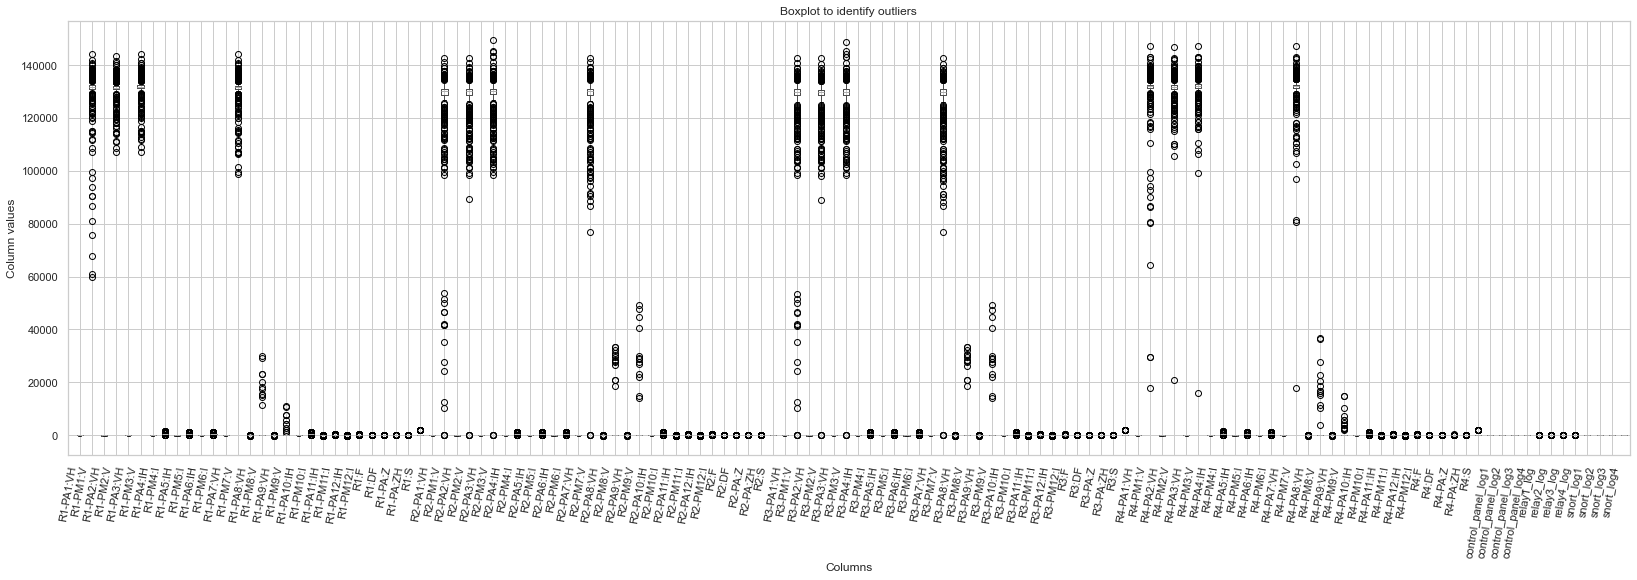

In [62]:
# By using box plot 
inde=Full_dataset_for_analysis.columns[:-1]
Features_Indices = np.arange(len(Full_dataset_for_analysis.columns[:-1]))
sns.set(style='whitegrid')
# adjust fig size
plt.figure(figsize=(28,8))
plt.title('Boxplot to identify outliers')
plt.xlabel('Columns')
plt.ylabel('Column values')
Full_dataset_for_analysis.boxplot()
plt.xticks(Features_Indices, inde, rotation = 80)
plt.show()

# Analyze statistics by class/category 
columns used selected randomly

In [63]:
Full_dataset_for_analysis.groupby('marker')['R1-PA4:IH'].describe()

,count,mean,std,min,25%,50%,75%,max
marker,,,,,,,,
Attack,556.0,-18.073191,93.775077,-178.911801,-94.552360,-31.280631,43.858487,179.880100
Natural,167.0,-5.585000,106.161135,-179.966044,-102.568040,-4.681065,73.415947,177.926314
NoEvents,54.0,-6.778197,93.394771,-178.207063,-89.919996,-7.442722,75.385489,145.221883


In [64]:
Full_dataset_for_analysis.groupby('marker')['control_panel_log3'].describe()

,count,mean,std,min,25%,50%,75%,max
marker,,,,,,,,
Attack,556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Natural,167.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NoEvents,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
Full_dataset_for_analysis.groupby('marker')['snort_log4'].describe()

,count,mean,std,min,25%,50%,75%,max
marker,,,,,,,,
Attack,556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Natural,167.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NoEvents,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
Full_dataset_for_analysis.groupby('marker')['R1-PM5:I'].describe()

,count,mean,std,min,25%,50%,75%,max
marker,,,,,,,,
Attack,556.0,395.710919,158.067377,0.00000,313.392765,385.26344,468.395380,1226.65389
Natural,167.0,384.671348,174.461454,0.00000,298.194635,381.78435,465.007845,1189.48256
NoEvents,54.0,388.393265,86.884200,255.07223,320.167835,385.44655,447.749728,655.53380


In [67]:
Full_dataset_for_analysis.groupby('marker')['relay2_log'].describe()

,count,mean,std,min,25%,50%,75%,max
marker,,,,,,,,
Attack,556.0,0.017986,0.133019,0.0,0.0,0.0,0.0,1.0
Natural,167.0,0.053892,0.226484,0.0,0.0,0.0,0.0,1.0
NoEvents,54.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# Univariate analysis using histograms to Visualize feature observation 
Univariate analysis enables us to identity features observation. Because of many data attributes only the first 15 fifteen features were considered 

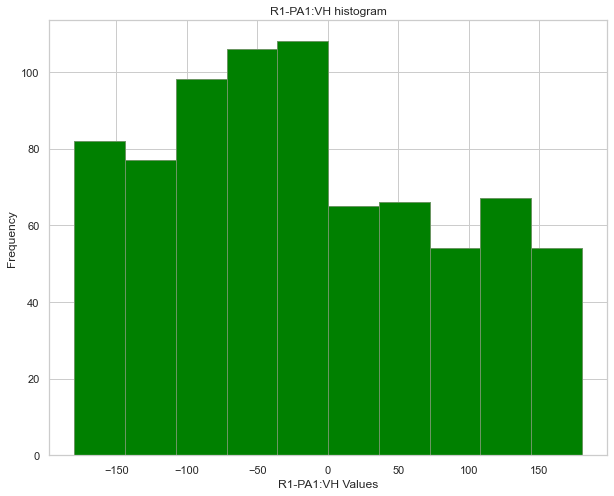

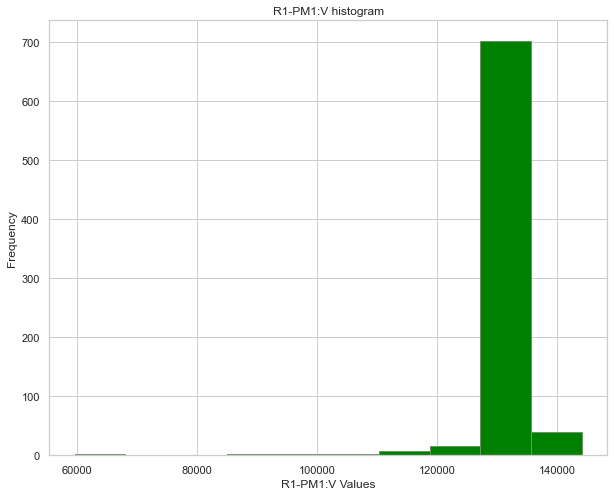

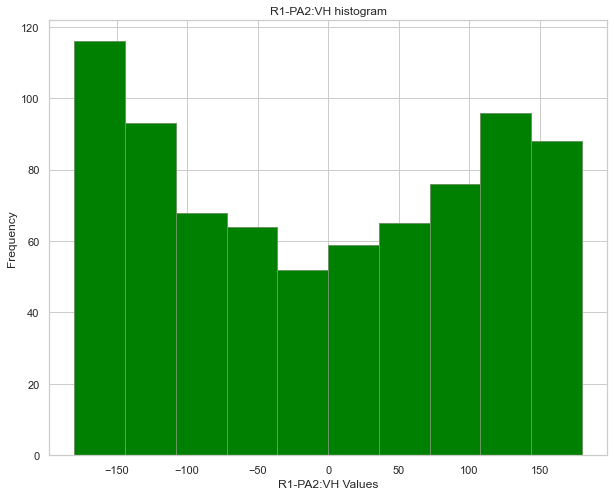

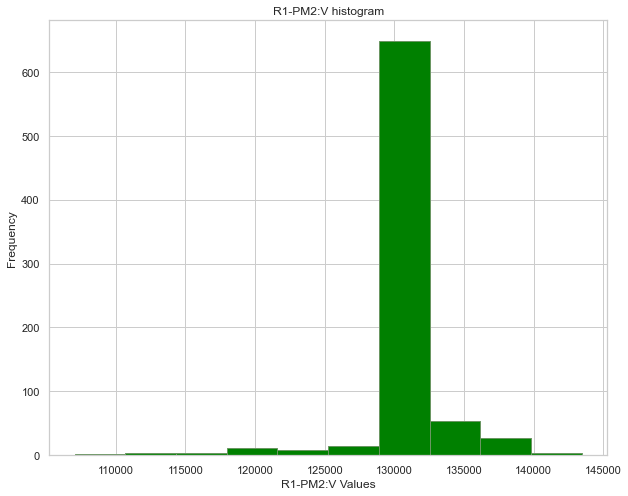

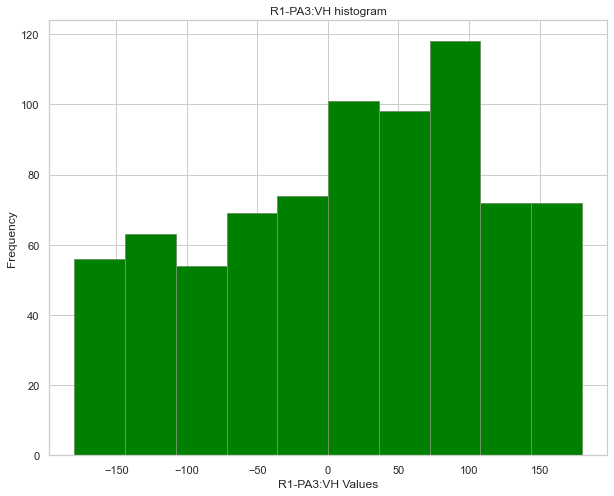

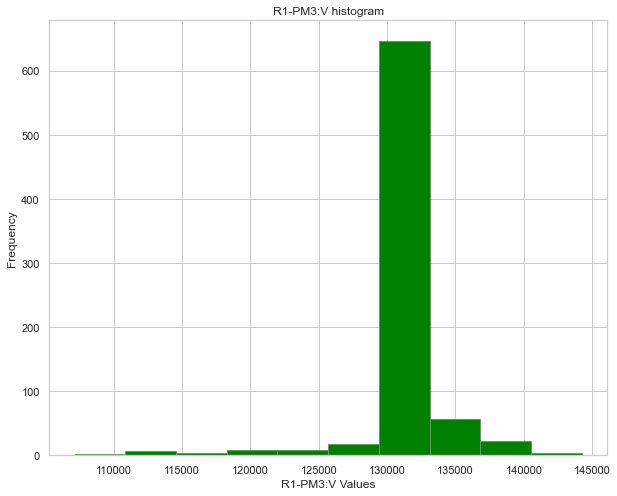

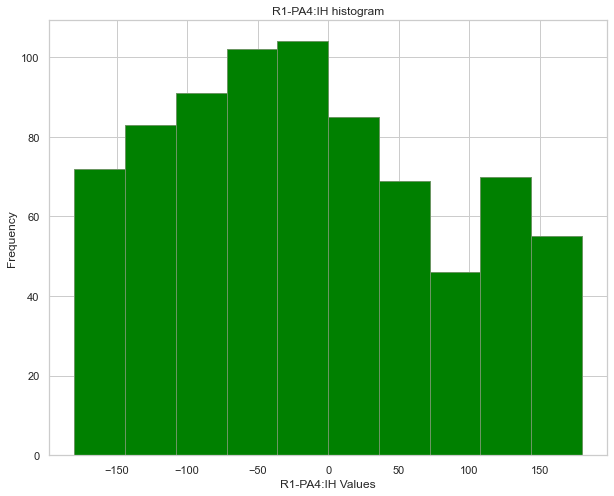

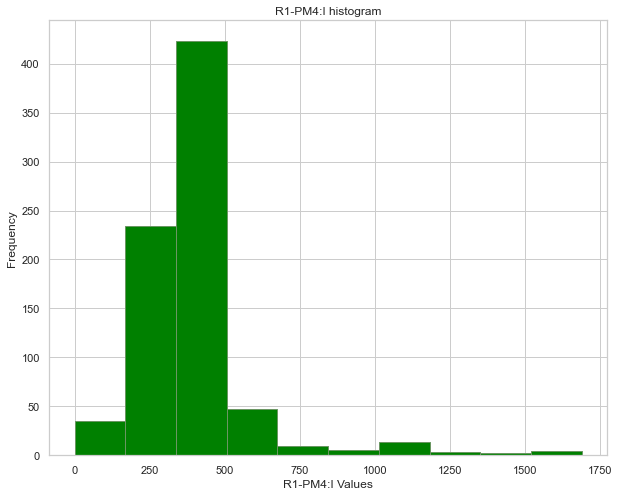

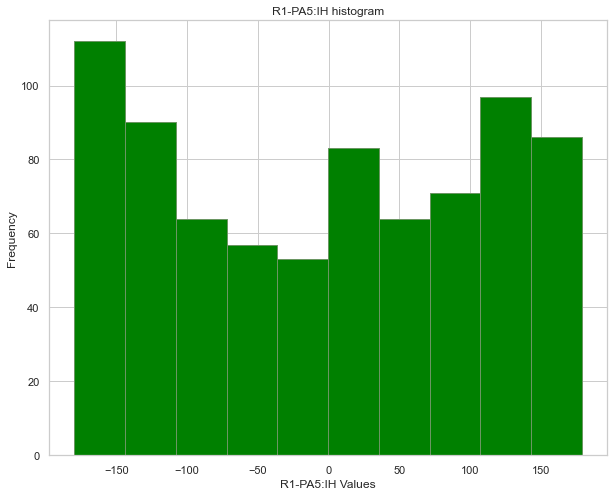

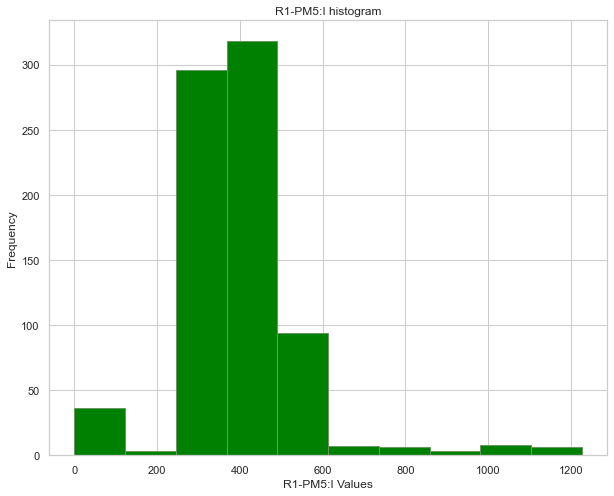

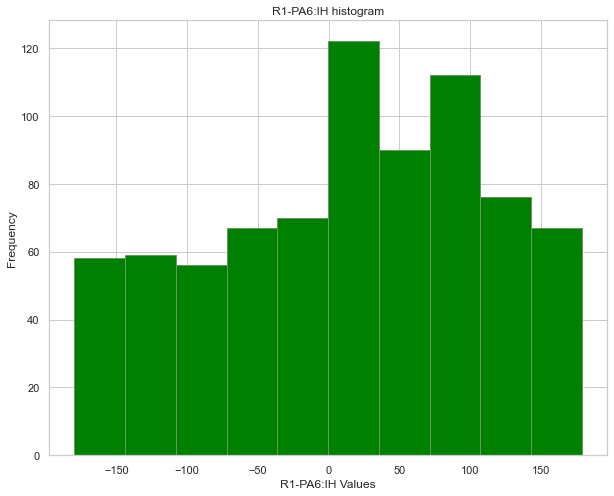

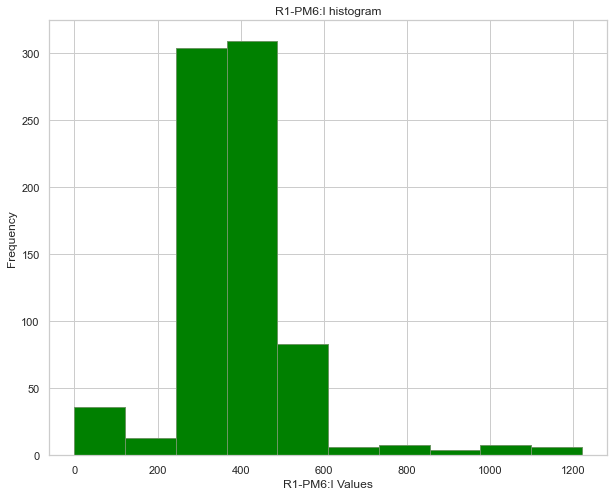

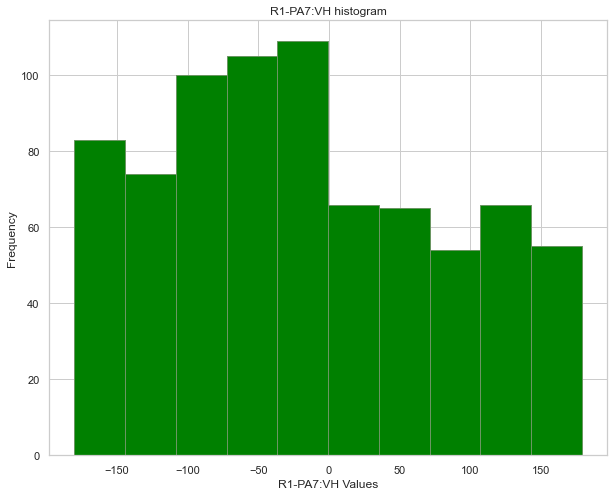

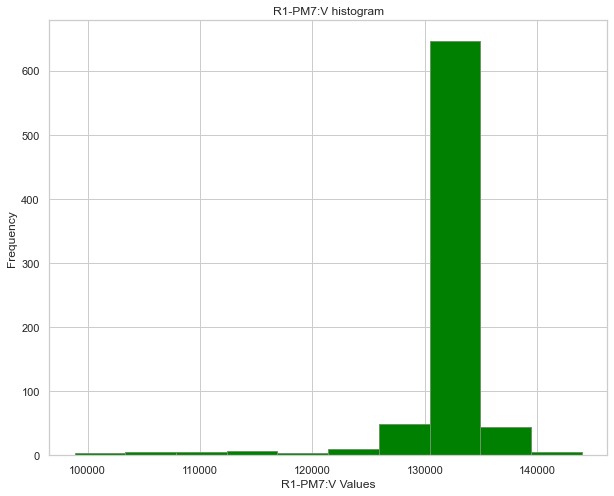

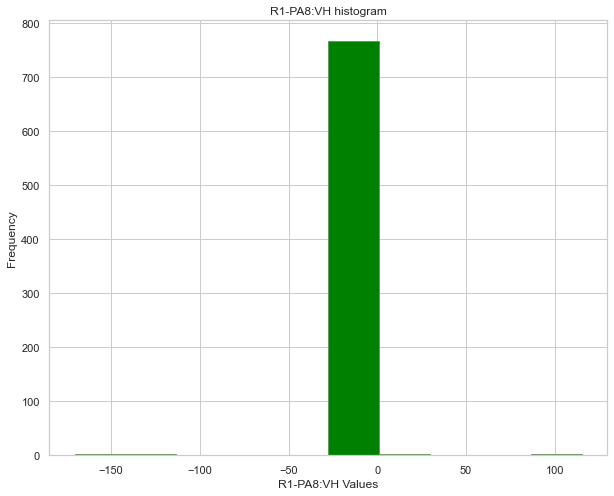

In [68]:
# plt.title('histogram diagram of column A2 values')
X_data=Full_dataset_for_analysis.iloc[:,:-1]
aa=X_data.columns
columns_for_hist_vis=aa[:15]
for i in range (len(columns_for_hist_vis)):
    plt.figure(figsize=(10,8))
    plt.hist(X_data[columns_for_hist_vis[i]], bins=10, edgecolor="#6A9662",color="green")
    plt.title(columns_for_hist_vis[i]+' histogram')
    plt.xlabel(columns_for_hist_vis[i]+' Values')
    plt.ylabel('Frequency')
    plt.show()


# Bi-variate analysing using pairwise
The purpose of bivariate analysis is to understand the relationship between two variables
There are three common ways to perform bivariate analysis: Scatterplots, Correlation Coefficients, Simple Linear Regression and pairplot however in our analysis I used pairplot and correlation coeefficient and due to the large number of features i made pairplot using the first ten predictor variables to see how the features are related. i naddition bivariate analysis with pairplot graph as it combines numerous plots such as histogram and scatter plots; it make it easy to recoginize the feature with outliers. The first ten were taken into consideration due to many data attributes

In [69]:
#Correlation 
# find the correlation among the variables, by the use of the correlation function. 
# This will give you a fair idea of the correlation strength between different variables
Full_dataset_for_analysis.iloc[:,:-1].corr()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,1.000000,0.006743,-0.344658,0.040875,-0.270300,0.034438,0.909635,-0.020908,-0.340979,-0.026320,...,NaN,NaN,0.015130,0.008094,-0.040302,-0.090134,NaN,NaN,NaN,NaN
R1-PM1:V,0.006743,1.000000,-0.008867,0.740150,-0.027854,0.750325,0.029657,-0.783182,-0.038835,-0.362429,...,NaN,NaN,0.109977,0.103731,-0.195409,-0.190955,NaN,NaN,NaN,NaN
R1-PA2:VH,-0.344658,-0.008867,1.000000,-0.013559,-0.376976,-0.014917,-0.320112,0.005523,0.888836,-0.000804,...,NaN,NaN,0.039534,0.006299,0.015506,0.046097,NaN,NaN,NaN,NaN
R1-PM2:V,0.040875,0.740150,-0.013559,1.000000,-0.072222,0.991759,0.072833,-0.751751,-0.060573,-0.680103,...,NaN,NaN,0.214276,0.195537,-0.452594,-0.394208,NaN,NaN,NaN,NaN
R1-PA3:VH,-0.270300,-0.027854,-0.376976,-0.072222,1.000000,-0.077966,-0.283767,0.056319,-0.356299,0.078282,...,NaN,NaN,-0.015004,0.029018,0.012059,0.034181,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relay4_log,-0.090134,-0.190955,0.046097,-0.394208,0.034181,-0.383147,-0.069811,0.371821,0.055586,0.457422,...,NaN,NaN,0.125128,-0.030611,0.604066,1.000000,NaN,NaN,NaN,NaN
snort_log1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
snort_log2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
snort_log3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


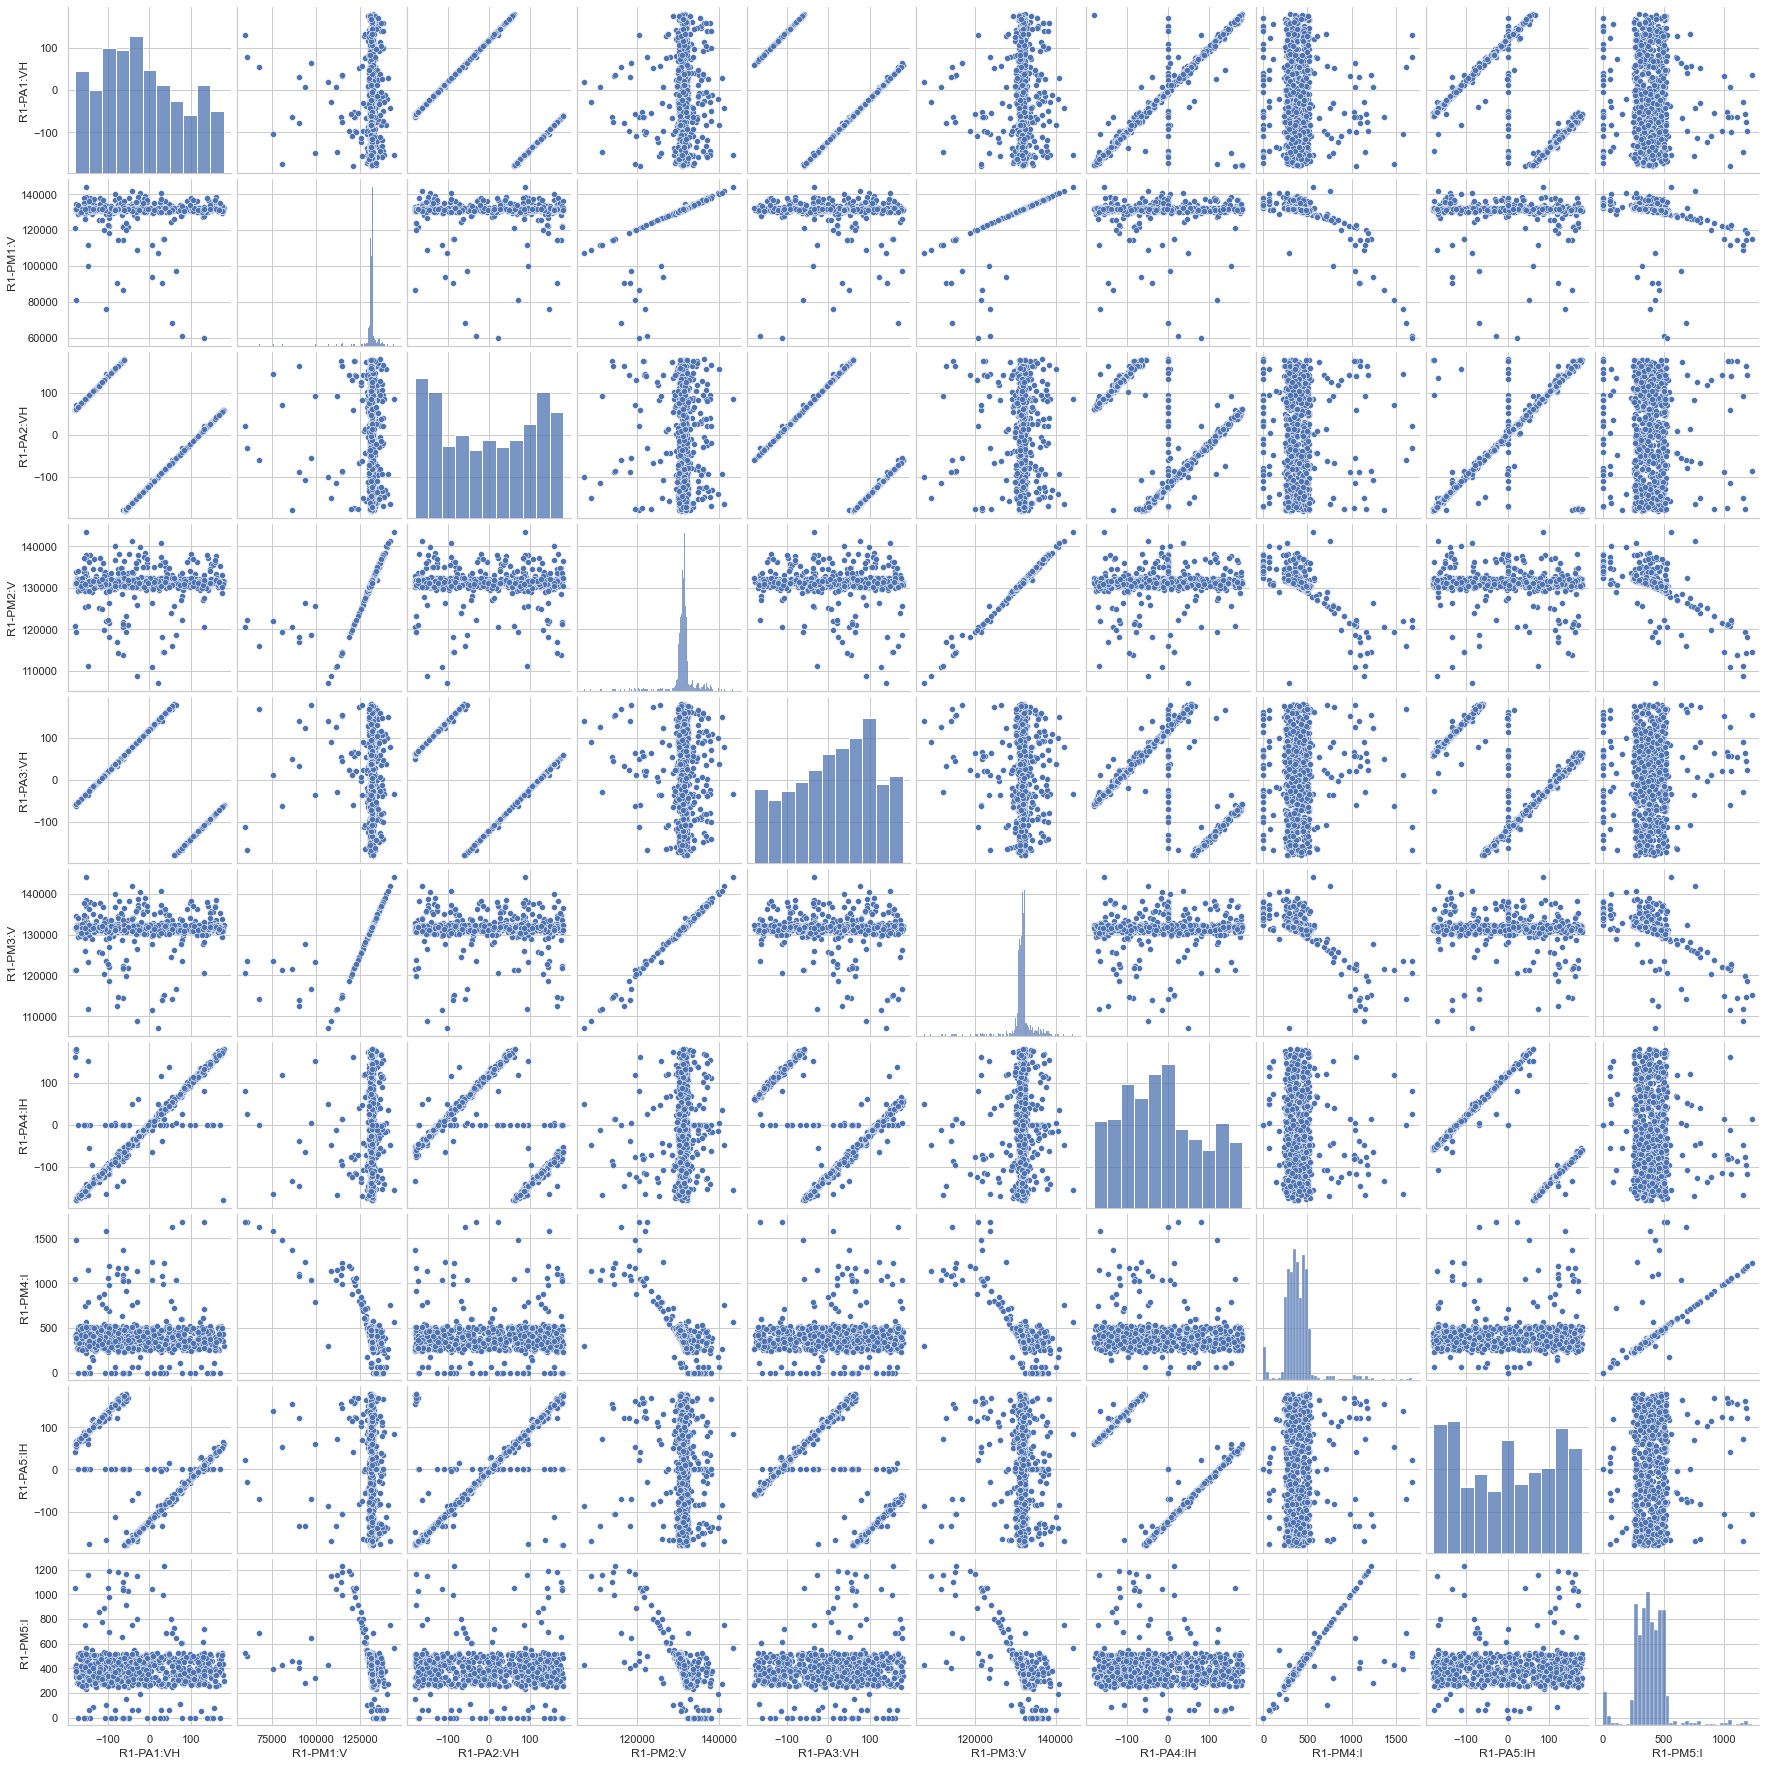

In [70]:
#Pairwise analysis---bivariate using pairpolt for the first ten features
sns.pairplot(Full_dataset_for_analysis[aa[:10]], diag_kind="hist" )
plt.show()
# sns.pairplot(data=New_dataframe, hue='marker', vars=aa[:10])
# plt.show()

In [71]:
#Pairwise analysis---bivariate
# sns.pairplot(data=New_dataframe, vars=aa[:10])
# plt.show()

# 3) Data Preprocessing
Data preprocessing: Enables one to improve the quality of training sets. It involves handling missing data, encoding categorical data including categorical classes, partitioning the data into training and test sets, scaling or standardizing the data, and selecting meaningful features. In our case I performed data preprocessing starting by lable encoding, handling outliers ferom training data (Independent variables) and scaling the data to improve the quality of our data for further assignment task completion

# a) Handling outliers
As identified in data exploration, there are outliers in the dataset features and the below function will help to handle the outliers using 25 and 75 % quantile values.
Detected outliers in the datasets were handled by replacing them median using imputation as if they were missing values and new dataset was generated. only Independent variables were put in as input to the function becuase there was no oultiers in marker column

In [72]:
Independent_Var=Full_dataset_for_analysis.iloc[:,:-1]
def outlier_detect(dataframe):
    for i in dataframe.describe().columns:
        Q1=dataframe.describe().at['25%',i]
        Q3=dataframe.describe().at['75%',i]
        IQR=Q3 - Q1
        Lower_bound=Q1 - 1.5 * IQR
        Upper_bound=Q3 + 1.5 * IQR
        x=np.array(dataframe[i])
        Pa=[]
        for j in x:
            if j < Lower_bound or j>Upper_bound:
                Pa.append(dataframe[i].median())
            else:
                Pa.append(j)
        dataframe[i]=Pa
    return dataframe
Processed_dataframe_Inde=outlier_detect(Independent_Var)
Processed_dataframe_Inde

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,-125.059498,131985.6933,114.963982,131935.5467,-5.036299,132060.9131,-124.721453,326.48513,113.680556,330.33044,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
1,27.656673,131283.6417,-92.326419,131233.4952,147.674142,131333.7883,25.576836,435.98491,-95.999079,440.37955,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
2,-73.688102,131785.1071,166.346837,131760.0339,46.340826,131835.2537,-75.710643,365.30445,164.318566,366.76933,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
3,64.887470,131609.5942,-55.089892,131584.5210,-175.090173,131684.8140,62.395104,388.55942,-56.711363,386.91143,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
4,126.577836,131258.5685,6.583285,130631.7367,-113.394077,131308.7150,122.486917,455.21146,2.584040,455.76079,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,-173.371299,131709.8873,66.657910,131383.9348,-53.348100,131760.0339,0.000000,378.12215,0.000000,385.08033,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
48,133.103825,131810.1804,13.132193,131760.0339,-106.879547,131860.3269,131.619865,348.82455,11.688339,347.54278,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
49,11.568018,131409.0081,-108.397885,131383.9348,131.596946,131484.2279,8.170378,421.88544,-111.841362,423.89965,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
50,-61.358050,131057.9823,178.659700,130406.0773,58.670878,131133.2021,-65.930253,480.29753,174.081767,480.48064,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0


# b) 1) Label encodeing for categorical data in marker column
This process enables us to convert categorical data into numerical data by applying labeleconder function

In [73]:
# Perform label encoding for categorical attributes in marker column
label_encoder=LabelEncoder()
# Encode labels in column marker
Full_dataset_for_analysis['marker']= label_encoder.fit_transform(Full_dataset_for_analysis['marker'])
# display dataframe after encoding
Full_dataset_for_analysis

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-125.059498,131985.6933,114.963982,131935.5467,-5.036299,132060.9131,-124.721453,326.48513,113.680556,330.33044,...,0,0,0,0,0,0,0,0,0,0
1,27.656673,131283.6417,-92.326419,131233.4952,147.674142,131333.7883,25.576836,435.98491,-95.999079,440.37955,...,0,0,0,0,0,0,0,0,0,1
2,-73.688102,131785.1071,166.346837,131760.0339,46.340826,131835.2537,-75.710643,365.30445,164.318566,366.76933,...,0,0,0,0,0,0,0,0,0,0
3,64.887470,131609.5942,-55.089892,131584.5210,-175.090173,131684.8140,62.395104,388.55942,-56.711363,386.91143,...,0,0,0,0,0,0,0,0,0,0
4,126.577836,131258.5685,6.583285,130631.7367,-113.394077,131308.7150,122.486917,455.21146,2.584040,455.76079,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,-173.371299,133991.5549,66.657910,133966.4816,-53.348100,134066.7747,0.000000,0.00000,0.000000,0.00000,...,0,1,1,0,0,0,0,0,0,0
48,133.103825,131810.1804,13.132193,131760.0339,-106.879547,131860.3269,131.619865,348.82455,11.688339,347.54278,...,0,0,0,0,0,0,0,0,0,2
49,11.568018,131409.0081,-108.397885,131383.9348,131.596946,131484.2279,8.170378,421.88544,-111.841362,423.89965,...,0,0,0,0,0,0,0,0,0,0
50,-61.358050,131057.9823,178.659700,130406.0773,58.670878,131133.2021,-65.930253,480.29753,174.081767,480.48064,...,0,0,0,0,0,0,0,0,0,0


# b) 2) Data Scaling
Scaling data enbables us to bring the data points close to each other so that the distance between them will be lower. We found that there are oultiers in the dataset and now are handled but its better to scale the data points so that they are significantly on similar scale and ML work better when features are considerably on similar scale.

In [74]:
#Scaling the data points from data set found after handling outliers
scaler=StandardScaler()
Inde_Var_scaled=pd.DataFrame((scaler.fit_transform(Processed_dataframe_Inde)), columns=Processed_dataframe_Inde.columns)
Inde_Var_scaled

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,-1.109277,0.549558,1.041183,0.959385,-0.203703,0.580853,-1.140982,-0.677645,1.046020,-0.708025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.454812,-0.506735,-0.777942,-0.086692,1.373431,-0.515876,0.416336,0.657683,-0.829745,0.617050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.583141,0.247760,1.492106,0.697866,0.326900,0.240489,-0.633156,-0.204251,1.499021,-0.269273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.836122,-0.016313,-0.451164,0.436346,-1.959952,0.013579,0.797828,0.079339,-0.478283,-0.026747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.467942,-0.544460,0.090063,-0.983330,-1.322779,-0.553694,1.420470,0.892146,0.052166,0.802252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-1.604077,0.134586,0.617262,0.137467,-0.702648,0.127034,0.151321,-0.047942,0.029049,-0.048795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
773,1.534780,0.285485,0.147535,0.697866,-1.255500,0.278307,1.515102,-0.405220,0.133612,-0.500775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774,0.290035,-0.318112,-0.918981,0.137467,1.207392,-0.288967,0.235978,0.485743,-0.971468,0.418619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
775,-0.456859,-0.846258,1.600160,-1.319569,0.454240,-0.818422,-0.531816,1.198066,1.586362,1.099897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Extracting Independent and dependent variables

In [75]:
# extracting independent and dependent data
Inde_Var_scaled   # Independent variables data
Dependent_variable=Full_dataset_for_analysis['marker']  # Dependent variable data

# 4) Model creation and evaluation

Using scikit-learn and 10-fold cross validation for model selection, random forest, logistic regression, and k-Nearest neighbor models will be created and later will be evaluated.
Results will be provided using three performance metrics (Precision, recall na df1 score)

# a) and b)
This is becuase by using scikit learn and cross validation model together model will built and evaluated at the same time

# Cross Validation: k-Fold Cross Validation

In [76]:
# instantiating number of k folds using KFold function from sklearn library
k=10    #set the number of splits (k)
#create cross validation object
Kfolds=KFold(n_splits=k, random_state=0, shuffle=True) #for 10-fold cross validation

# 1) Random forest model

In [77]:
warnings.simplefilter('ignore')
# building the model, fit and evaluate using crossvalidate function along side with 10 foold cross validation
Rand_Scores = cross_validate(RandomForestClassifier(random_state=0), Inde_Var_scaled,Dependent_variable , scoring = ['precision_weighted','recall_weighted','f1_weighted'],cv=Kfolds)
scores = list(Rand_Scores.keys())
CV_Precision_RF= Rand_Scores[scores[2]].mean()
CV_Recall_RF = absolute(Rand_Scores[scores[3]]).mean()
CV_F1score_RF= Rand_Scores[scores[4]].mean()
print(f' Random Forest performance:\n\n Precision = {CV_Precision_RF}\n Recall = {CV_Recall_RF}\n F1-score = {CV_F1score_RF}')

 Random Forest performance:

 Precision = 0.65612504796291
 Recall = 0.7041292041292041
 F1-score = 0.6498399291148559


# 2) Logistic regression nodel

In [78]:
Logistic_Scores = cross_validate(LogisticRegression(warm_start=False), Inde_Var_scaled, Dependent_variable, scoring=['precision_weighted','recall_weighted','f1_weighted'], cv = Kfolds)
scores = list(Logistic_Scores.keys())
Logistic_Precision = absolute(Logistic_Scores[scores[2]]).mean()
Logistic_Recall= Logistic_Scores[scores[3]].mean()
Logistic_F1score= Logistic_Scores[scores[4]].mean()

print(f' Logistic Regression performance:\n\n Precision = {Logistic_Precision}\n Recall = {Logistic_Recall}\n F1-score = {Logistic_F1score}')


 Logistic Regression performance:

 Precision = 0.6093406968756355
 Recall = 0.699000999000999
 F1-score = 0.6348296162413116


# 3) k-Nearest neighbor model

In [79]:
KNN_Classifier_Scores = cross_validate(KNeighborsClassifier(), Inde_Var_scaled, Full_dataset_for_analysis['marker'], scoring =['precision_weighted','recall_weighted','f1_weighted'],cv=Kfolds)
scores = list(KNN_Classifier_Scores.keys())
# perfromance results
KNN_Precision= absolute(KNN_Classifier_Scores[scores[2]]).mean()
KNN_Recall= KNN_Classifier_Scores[scores[3]].mean()
KNN_F1_score= KNN_Classifier_Scores[scores[3]].mean()

print(f' k-Nearest neighbor performance:\n\n Precision = {KNN_Precision}\n Recall = {KNN_Recall}\n F1-score = {KNN_F1_score}')


 k-Nearest neighbor performance:

 Precision = 0.6047690021743204
 Recall = 0.6835997335997337
 F1-score = 0.6835997335997337


# Make visualization of the models performance before feature selection where precision, recall and f1score used to evaluate the models

In [80]:
# making a dataframe to easy extracting value for perfomance metric to visualize the results as well as to efficiently draw the conclusion through comparison
Model_perfromance_RF=pd.DataFrame([CV_Precision_RF,CV_Recall_RF,CV_F1score_RF],columns=["RF Performance"])
Model_perfromance_Log=pd.DataFrame([Logistic_Precision,Logistic_Recall,Logistic_F1score], columns=["Logistic Performance"])
Model_perfromance_KNN=pd.DataFrame([KNN_Precision,KNN_Recall,KNN_F1_score], columns=["KNN Performance"])
Metrics=pd.DataFrame(["Precision", "Recall", "F1_score"], columns=["Performance Metrics"])
# Overall data frame for the models before features selection
Performance=pd.concat([Metrics, Model_perfromance_RF,Model_perfromance_Log,Model_perfromance_KNN],axis=1)
Performance

,Performance Metrics,RF Performance,Logistic Performance,KNN Performance
0,Precision,0.656125,0.609341,0.604769
1,Recall,0.704129,0.699001,0.683600
2,F1_score,0.649840,0.634830,0.683600


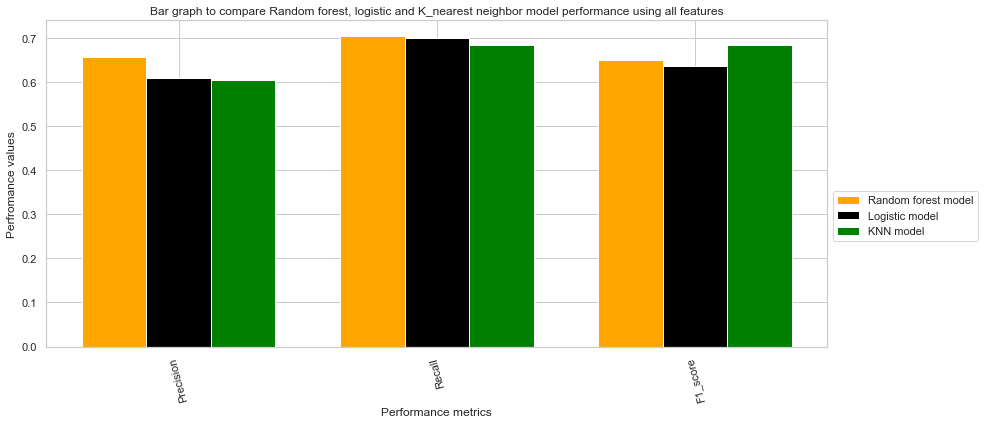

In [81]:
# locate features index to set position of bar on X axis to be able to make two bar graphs together 
Features_Indices = np.arange(len(Model_perfromance_KNN))
width = 0.25
# adjust fig size
plt.figure(figsize=(14,6)) 
# make a bar to cpmpare performance metrics output on various models
plt.bar(Features_Indices, Performance['RF Performance'], width, label = 'Random forest model', color="orange")
plt.bar(Features_Indices+width, Performance['Logistic Performance'], width, label = 'Logistic model', color="black")
plt.bar(Features_Indices+(width*2), Performance['KNN Performance'],width, label = 'KNN model', color="green")
# get and set the current tick locations and labels the x-axis with features name 
plt.xticks(Features_Indices+width, Performance['Performance Metrics'], rotation = 105)
plt.xlabel("Performance metrics")
plt.ylabel("Perfromance values")
plt.title("Bar graph to compare Random forest, logistic and K_nearest neighbor model performance using all features")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.4))
plt.show()

# 5) Feature Selection and Engineering

# a) Perform feature selection on the dataset to determine new features to be used in model building

In [82]:
#Perfroming feature selection using Lasso
Lasso_model = Lasso(alpha=0.0001).fit(Inde_Var_scaled,Dependent_variable)
Best_features=Lasso_model.coef_ > 0
Best_features=Inde_Var_scaled.columns[Best_features]
Best_features

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA5:IH',
       'R1-PM5:I', 'R1-PA6:IH', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PM10:I',
       'R1-PM11:I', 'R1:F', 'R1-PA:ZH', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH',
       'R2-PM3:V', 'R2-PM4:I', 'R2-PA5:IH', 'R2-PA6:IH', 'R2-PA7:VH',
       'R2-PA10:IH', 'R2-PM10:I', 'R2-PM11:I', 'R2:F', 'R2-PA:Z', 'R2-PA:ZH',
       'R3-PA2:VH', 'R3-PM2:V', 'R3-PA3:VH', 'R3-PA4:IH', 'R3-PM4:I',
       'R3-PM5:I', 'R3-PM6:I', 'R3-PM7:V', 'R3-PM11:I', 'R3-PA12:IH', 'R3:F',
       'R3-PA:ZH', 'R4-PM1:V', 'R4-PM7:V', 'R4-PA10:IH', 'R4-PA12:IH',
       'R4-PM12:I', 'R4:F', 'R4-PA:Z'],
      dtype='object')

In [83]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(Inde_Var_scaled, Dependent_variable)
Best_Feat=mutual_info > 0
Best_feature=Inde_Var_scaled.columns[Best_Feat]
Best_feature

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       ...
       'R4:DF', 'R4-PA:Z', 'R4-PA:ZH', 'control_panel_log1',
       'control_panel_log3', 'relay1_log', 'relay2_log', 'relay3_log',
       'relay4_log', 'snort_log2'],
      dtype='object', length=108)

# b) Building the models based on identified features using scikit-learn and 10 folds cross validation and c) Evaluate models performance using the same perofrmance metrics in 4b) [precision, recall and f1-score]

# 1) Random Forest model

In [84]:
Independ_Varia_bes=Inde_Var_scaled[Best_features]
warnings.simplefilter('ignore')
Rand_Scores_best = cross_validate(RandomForestClassifier(random_state=0), Independ_Varia_bes,Dependent_variable , scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted'],cv=Kfolds)
scores_best = list(Rand_Scores_best.keys())
CV_Precision_RF_Best= Rand_Scores_best[scores_best[2]].mean()
CV_Recall_RF_best = Rand_Scores_best[scores_best[3]].mean()
CV_F1score_RF_Best= Rand_Scores_best[scores_best[4]].mean()
print(f' Random Forest performance using selected features:\n\n Precision = {CV_Precision_RF_Best}\n Recall = {CV_Recall_RF_best}\n F1-score = {CV_F1score_RF_Best}')

 Random Forest performance using selected features:

 Precision = 0.7131202131202131
 Recall = 0.681077299779477
 F1-score = 0.7131202131202131


# 2) Logistic Regression Model

In [85]:
Logistic_Scores_best = cross_validate(LogisticRegression(warm_start=False), Independ_Varia_bes, Dependent_variable, scoring=['precision_weighted','recall_weighted','f1_weighted'], cv = Kfolds)
scores_Bes = list(Logistic_Scores_best.keys())
Logistic_Precision_Bes = Logistic_Scores_best[scores_Bes[2]].mean()
Logistic_Recall_Bes= Logistic_Scores_best[scores_Bes[3]].mean()
Logistic_F1score_Bes= Logistic_Scores_best[scores_Bes[4]].mean()
print(f' Logistic Regression performance  using selected features:\n\n Precision = {Logistic_Precision_Bes}\n Recall = {Logistic_Recall_Bes}\n F1-score = {Logistic_F1score_Bes}')

 Logistic Regression performance  using selected features:

 Precision = 0.5851313298099982
 Recall = 0.7041625041625041
 F1-score = 0.6252294247611725


# 3) k-Nearest neighbor Model

In [86]:
KNN_Classifier_Scores_Best = cross_validate(KNeighborsClassifier(), Independ_Varia_bes, Dependent_variable, scoring =['precision_weighted','recall_weighted','f1_weighted'],cv=Kfolds)
scores_B = list(KNN_Classifier_Scores_Best.keys())
KNN_Precision_Best= KNN_Classifier_Scores_Best[scores_B[2]].mean()
KNN_Recall_Best= KNN_Classifier_Scores_Best[scores_B[3]].mean()
KNN_F1_score_Best= KNN_Classifier_Scores_Best[scores_B[4]].mean()
print(f' k-Nearest neighbor performance using selected features:\n\n Precision = {KNN_Precision_Best}\n Recall = {KNN_Recall_Best}\n F1-score = {KNN_F1_score_Best}')

 k-Nearest neighbor performance using selected features:

 Precision = 0.6057413012066588
 Recall = 0.6888278388278388
 F1-score = 0.6181796399567895


In [87]:
Model_perfromance_RF_=pd.DataFrame([CV_Precision_RF_Best,CV_Recall_RF_best,CV_F1score_RF_Best],columns=["RF Performance"])
Model_perfromance_Log_=pd.DataFrame([Logistic_Precision_Bes,Logistic_Recall_Bes,Logistic_F1score_Bes], columns=["Logistic Performance"])
Model_perfromance_KNN_=pd.DataFrame([KNN_Precision_Best,KNN_Recall_Best,KNN_F1_score_Best], columns=["KNN Performance"])
# Overall data frame for the models after features selection
Performance_After_Feat_selec=pd.concat([Metrics, Model_perfromance_RF_,Model_perfromance_Log_,Model_perfromance_KNN_],axis=1)
Performance_After_Feat_selec

,Performance Metrics,RF Performance,Logistic Performance,KNN Performance
0,Precision,0.713120,0.585131,0.605741
1,Recall,0.681077,0.704163,0.688828
2,F1_score,0.713120,0.625229,0.618180


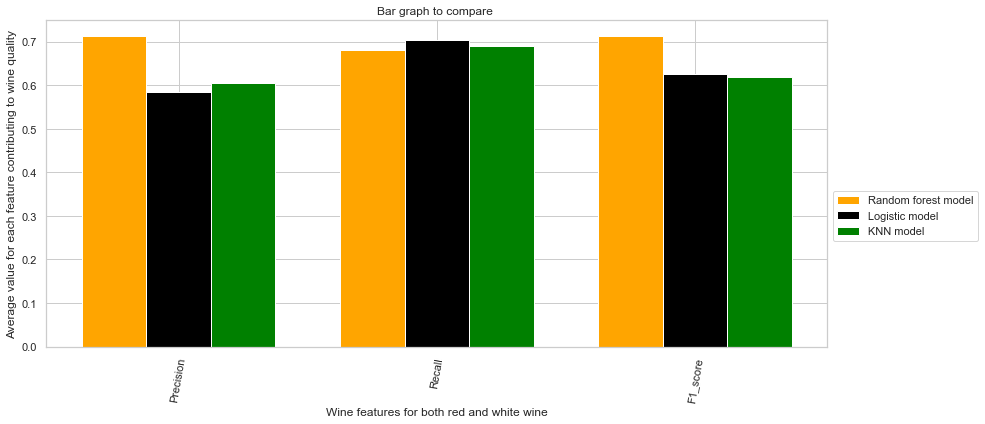

In [88]:
# adjust fig size
plt.figure(figsize=(14,6)) 
# make a bar plot for both wine
plt.bar(Features_Indices, Performance_After_Feat_selec['RF Performance'], width, label = 'Random forest model', color="orange")
plt.bar(Features_Indices+width, Performance_After_Feat_selec['Logistic Performance'], width, label = 'Logistic model', color="black")
plt.bar(Features_Indices+ width*2, Performance_After_Feat_selec['KNN Performance'], width, label = 'KNN model', color="green")
# get and set the current tick locations and labels the x-axis with features name 
plt.xticks(Features_Indices+width, Performance_After_Feat_selec['Performance Metrics'], rotation = 80)
plt.xlabel("Wine features for both red and white wine")
plt.ylabel("Average value for each feature contributing to wine quality")
plt.title("Bar graph to compare ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.4))
plt.show()

# 6) Hyper parameter tuning

# a) selecting the benchmark model
By compare the performance of the models with feature selection and those without feature selection, the selected model to be the benchmark is Random forest classifier.
The benchmark model is the model with the best performance overall and it is clear from 4b and 5c that Random forest model is the one that performed well. 

# Hyperparameter tuning using Gridsearch and sklearn for benchmark model 

In [89]:
warnings.simplefilter("ignore")
#Create random forest classifier
rf=RandomForestClassifier(random_state=0)
#Define the search space
search_space={
             'n_estimators':[10,40,70,90,120],\
             'max_depth':[2,3,5,10,20],\
             'max_leaf_nodes':[3,5,7,8,9,20]\
             }
#Create a GridSearch object
gd_search=GridSearchCV(estimator=rf, param_grid=search_space,\
                        cv=Kfolds, n_jobs=1,scoring='accuracy')
gd_search=gd_search.fit(Independ_Varia_bes,Dependent_variable)

#Retrive details of the best parameters
print(gd_search.best_params_)
#Obtain the best score
gd_search.best_estimator_

{'max_depth': 3, 'max_leaf_nodes': 7, 'n_estimators': 10}


RandomForestClassifier(max_depth=3, max_leaf_nodes=7, n_estimators=10,
                       random_state=0)

# b) Building the benchmark model (Random forest classifier) after performing hyperparameter tuning

In [90]:
warnings.simplefilter('ignore')
Rand_Scores_Tuned = cross_validate(gd_search.best_estimator_, Independ_Varia_bes,Dependent_variable , scoring = ['precision_weighted','recall_weighted','f1_weighted'],cv=Kfolds)
scores_Tuned_RF = list(Rand_Scores_Tuned.keys())
CV_Precision_RF_Tuned= Rand_Scores_Tuned[scores_Tuned_RF[2]].mean()
CV_Recall_RF_Tuned = Rand_Scores_Tuned[scores_Tuned_RF[3]].mean()
CV_F1score_RF_Tuned= Rand_Scores_Tuned[scores_Tuned_RF[4]].mean()
print(f' Random Forest performance using selected features:\n\n Precision = {CV_Precision_RF_Tuned}\n Recall = {CV_Recall_RF_Tuned}\n F1-score = {CV_F1score_RF_Tuned}')

 Random Forest performance using selected features:

 Precision = 0.5443169994618546
 Recall = 0.7171162171162171
 F1-score = 0.6019282796160489


# Compare the performance of the tuned model in step 6 against that of the benchmark model selected in step 6 using visualizations to highlight the comparison
Compare the performance of the tuned model in 6a) against that of the
benchmark model selected in 6a). You may use visualizations to highlight the
comparison.

In [91]:
Model_perfromance_Bef_Tuning=pd.DataFrame([CV_Precision_RF_Best,CV_Recall_RF_best,CV_F1score_RF_Best],columns=["Benchmark Model Performance"])
Model_perfromance_After_Tuning=pd.DataFrame([CV_Precision_RF_Tuned,CV_Recall_RF_Tuned,CV_F1score_RF_Tuned], columns=["Tuned Model Performance"])
Metrics=pd.DataFrame(["Precision", "Recall", "F1_score"], columns=["Performance Metrics"])
# Overall data frame for the models before features selection
Benchmark_Performance=pd.concat([Metrics, Model_perfromance_Bef_Tuning,Model_perfromance_After_Tuning],axis=1)
Benchmark_Performance

,Performance Metrics,Benchmark Model Performance,Tuned Model Performance
0,Precision,0.713120,0.544317
1,Recall,0.681077,0.717116
2,F1_score,0.713120,0.601928


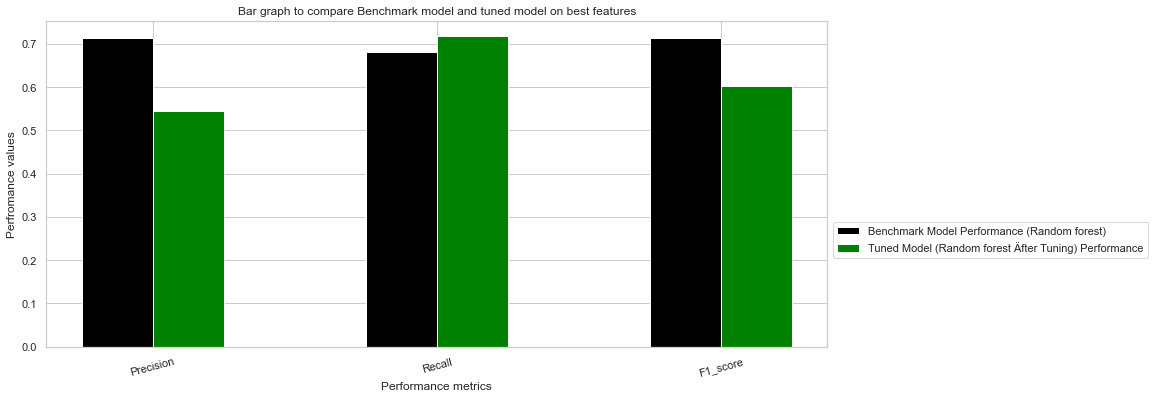

In [92]:
# adjust fig size
plt.figure(figsize=(14,6)) 
# make a bar plot for both wine
plt.bar(Features_Indices - width/2, Benchmark_Performance['Benchmark Model Performance'], width, label = 'Benchmark Model Performance (Random forest)', color="black")
plt.bar(Features_Indices + width/2, Benchmark_Performance['Tuned Model Performance'],width, label = 'Tuned Model (Random forest Äfter Tuning) Performance', color="green")
# get and set the current tick locations and labels the x-axis with features name 
plt.xticks(Features_Indices, Performance['Performance Metrics'], rotation = 15)
plt.xlabel("Performance metrics")
plt.ylabel("Perfromance values")
plt.title("Bar graph to compare Benchmark model and tuned model on best features")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.4))
plt.show()

# 7) Technical Report in pdf format